In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cd ..

C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\analysis


In [3]:
cd ..

C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project


In [4]:
cd data

C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data


In [5]:
cd raw

C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data\raw


In [6]:
df=pd.read_csv("Athenslistings.csv")

In [51]:
df= df[[ 'neighbourhood', 'accommodates', 'price','room_type', 'property_type']]

df['price']=df['price'].replace({r'\$':''}, regex = True).replace({r'\,':''}, regex = True)
df['price'] = pd.to_numeric(df['price'])



In [63]:
order_df = (df
             .groupby('room_type')['price']
             .mean()
             .sort_values(ascending=False)
             .to_frame()
             .reset_index()
           )


In [53]:
order_df2 = (df
             .groupby('room_type')['accommodates']
             .mean()
             .sort_values(ascending=False)
             .to_frame()
             .reset_index()
           )

Text(0.5, 0, 'Room Type')

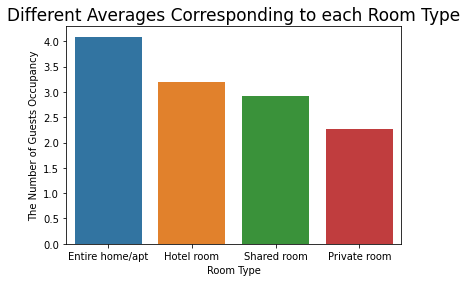

<AxesSubplot:xlabel='count', ylabel='room_type'>

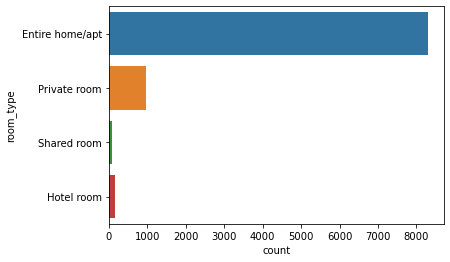

In [62]:
sns.countplot(y='room_type',data=df)
plt.ylabel('Room Type')
plt.title('Amount of Room Type Availabilie',fontsize=17)
plt.xlabel('Room Type')
## all of the room types on Airbnb in Athens, the most common one is entire home/apt with over 8000 being offered

Text(0.5, 0, 'Room Type')

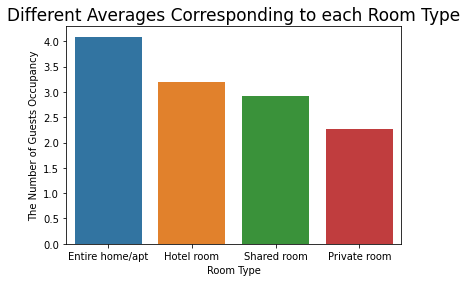

In [118]:
sns.barplot(x='room_type', y="accommodates", data=order_df2)
plt.ylabel('The Number of Guests Occupancy')
plt.title('Different Averages Corresponding to each Room Type',fontsize=17)
plt.xlabel('Room Type')
## The bar shows the best choice of room type based on the amount of guests booking.
#Therefore if the guest has a party of 4 or higher the best option is to look into entire home/appartments listings. 

In [70]:
df['per_person'] = df['price']/df['accommodates']
df['per_person']=df['per_person'].round(2)
df['per_person']=pd.to_numeric(df['per_person'])
print(df['per_person'])

0        9.25
1       12.50
2       20.00
3       12.50
4       12.50
        ...  
9505    25.00
9506    10.00
9507    65.33
9508     5.67
9509    62.50
Name: per_person, Length: 9510, dtype: float64


In [71]:
order_df3 = (df
             .groupby('room_type')['per_person']
             .mean()
             .sort_values(ascending=False)
             .to_frame()
             .reset_index()
           )

Text(0.5, 0, 'Room Type')

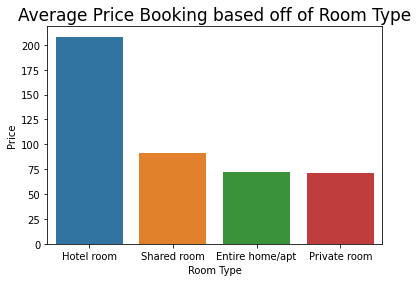

In [78]:
sns.barplot(x='room_type', y="price", data=order_df,)
plt.ylabel('Price')
plt.title('Average Price Booking based off of Room Type',fontsize=17)
plt.xlabel('Room Type')
## The barplot shows the average prices of each room type. Based on the graph, renter's should avoid any hotel room listing if they are working on a budget. 

In [117]:
def load_and_process(url_or_path_to_csv_file):
    
    df = (
    pd.read_csv("Athenslistings.csv")
    .drop(columns =['id','listing_url',
 'scrape_id','last_scraped','name','description','neighborhood_overview',
 'picture_url','host_id','host_url','host_name','host_since','host_location',
 'host_about','host_response_time','host_response_rate','host_acceptance_rate',
 'host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood',
 'host_listings_count','host_total_listings_count','host_verifications',
 'host_has_profile_pic','host_identity_verified','neighbourhood_cleansed',
 'neighbourhood_group_cleansed','latitude','longitude','bathrooms','bathrooms_text',
 'bedrooms','beds','amenities','minimum_nights','maximum_nights','minimum_minimum_nights',
 'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
 'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated',
 'has_availability','availability_30','availability_60','availability_90',
 'availability_365','calendar_last_scraped','number_of_reviews','number_of_reviews_ltm',
 'number_of_reviews_l30d','first_review','last_review','review_scores_rating',
 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
 'review_scores_communication','review_scores_location','review_scores_value',
 'license','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
 'reviews_per_month'])    
        .dropna()
        .reset_index(drop=True)
    )
    
df2 = (
    df
    .replace({r'$':''}, regex=True)
    .replace({r',':''}, regex=True)
    .to_numeric(df['price'])
    .assign(per_person = df['price']/df['accommodates'])
    .to_numeric(df['per_person'])
    .round({'per_person':2})
    .reset_index(drop=True)
     )

return df2

AttributeError: 'DataFrame' object has no attribute 'to_numeric'

In [119]:
print('My research question prior to analysing the data was to see the different listing availabilities as well as their corresponding prices. To determine which type of housing is the most accessible and which ones offer the best prices. Upon cleaning the data, formating the guest occupancy and prices as averages to provide a concise number, I was able to create three different graphs to visualize which listing were the best option for each scenario. The first and third graph led me to the concludsion that since the best type of listing to seek out are the entire home/appartments as they are the most common listings and have the lower average price range. In the case that the renter is searching for a listing that will be able to accommatdate to a party that is either intimate or large graph 2 displays that the entire house/appartment is the best option. In conclusion, the best listing I found based on my data analysis are entire house/appartment.')

My research question prior to analysing the data was to see the different listing availabilities as well as their corresponding prices. To determine which type of housing is the most accessible and which ones offer the best prices. Upon cleaning the data, formating the guest occupancy and prices as averages to provide a concise number, I was able to create three different graphs to visualize which listing were the best option for each scenario. The first and third graph led me to the concludsion that since the best type of listing to seek out are the entire home/appartments as they are the most common listings and have the lower average price range. In the case that the renter is searching for a listing that will be able to accommatdate to a party that is either intimate or large graph 2 displays that the entire house/appartment is the best option. In conclusion, the best listing I found based on my data analysis are entire house/appartment.
